## 1. (Differentiation using limits) - 
Central-difference formula of order $O(h^2 )$. To approximate f′(x) numerically by generating the sequence
$$
f^{\prime}(x) \approx D_k=\frac{f\left(x+10^{-k} h\right)-f\left(x-10^{-k} h\right)}{2\left(10^{-k} h\right)} \quad \text { for } k=0, \ldots, n
$$
until $\left|D_{n+1}-D_n\right| \geq\left|D_n-D_{n-1}\right|$ or $\left|D_n-D_{n-1}\right|<$ tolerance, which is an attempt to find the best approximation $f^{\prime}(x) \approx D_n$.



In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def central_difference_2nd_order(f, x, h, n=100, tolerance=1e-6):
    D_prev = 0.0
    for k in range(n+1):
        h_k = 10**(-k) * h
        D_k = (f(x + h_k) - f(x - h_k)) / (2 * h_k)

        if k > 0 and abs(D_k - D_prev) >= abs(D_prev - D_prev_prev):
            break
        
        D_prev_prev = D_prev
        D_prev = D_k

        if k > 1 and abs(D_prev - D_prev_prev) < tolerance:
            break

    return D_k

In [11]:
# Example usage:
# Define the function you want to find the derivative of
def example_function(x):
    return x**2

# Choose a point x, step size h, maximum iterations n, and tolerance
x_val = 2.0
step_size = 0.1
max_iterations = 10
tolerance_val = 1e-6

# Calculate the derivative using the central difference formula
result = central_difference_2nd_order(example_function, x_val, step_size, max_iterations, tolerance_val)

# Print the result
print(f"Approximation of f'({x_val}) using central difference formula: {result}")


Approximation of f'(2.0) using central difference formula: 3.9999999999995595


## 2. Central-difference formula of order O(h4 ).
f′(x) can be approximated numerically using the formula:

$$f^{\prime}(x)=\frac{-f(x+2 h)+8 f(x+h)-8 f(x-h)+f(x-2 h)}{12 h}$$

In [3]:
def central_difference_4th_order(f, x, h):
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12 * h)

In [4]:
# Example usage:
# Define the function you want to find the derivative of
def example_function(x):
    return x**2

# Choose a point x and step size h
x_val = 2.0
step_size = 0.1

# Calculate the derivative using the central difference formula of order O(h^4)
result = central_difference_4th_order(example_function, x_val, step_size)

# Print the result
print(f"Approximation of f'({x_val}) using central difference formula (order O(h^4)): {result}")


Approximation of f'(2.0) using central difference formula (order O(h^4)): 4.000000000000002


## 3. Let f (x) = cos(x).
1. Use central difference formulas of orders $O(h^2)$ and $O(h^4)$ with step sizes h = 0.1, 0.01, 0.001, and 0.0001, and calculate approximations for f'(0.8). Carry nine decimal places in all the calculations.
2. Compare with the true value f′(0.8) = − sin(0.8).
3. Plot the error as a function of step size h and identify the optimal step size for both the cases.

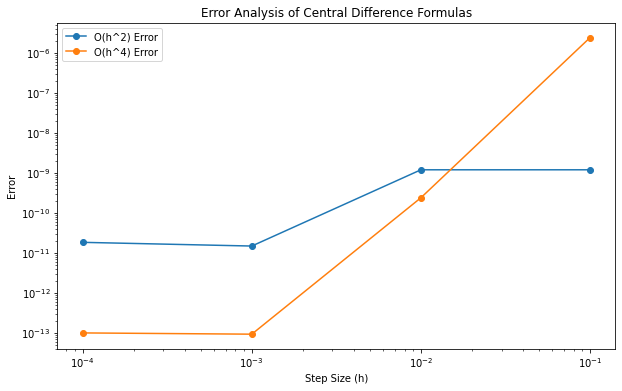

In [12]:
# True derivative value at x=0.8
true_derivative_value = -np.sin(0.8)

# Step sizes to consider
step_sizes = [0.1, 0.01, 0.001, 0.0001]

# Lists to store errors for O(h^2) and O(h^4) respectively
errors_2nd_order = []
errors_4th_order = []

# Calculate errors for each step size
for h in step_sizes:
    # Calculate approximations using central difference formulas
    approx_2nd_order = central_difference_2nd_order(np.cos, 0.8, h)
    approx_4th_order = central_difference_4th_order(np.cos, 0.8, h)

    # Calculate errors
    error_2nd_order = abs(approx_2nd_order - true_derivative_value)
    error_4th_order = abs(approx_4th_order - true_derivative_value)

    # Append errors to the lists
    errors_2nd_order.append(error_2nd_order)
    errors_4th_order.append(error_4th_order)

# Plot the errors
plt.figure(figsize=(10, 6))
plt.loglog(step_sizes, errors_2nd_order, marker='o', label='O(h^2) Error')
plt.loglog(step_sizes, errors_4th_order, marker='o', label='O(h^4) Error')
plt.xlabel('Step Size (h)')
plt.ylabel('Error')
plt.title('Error Analysis of Central Difference Formulas')
plt.legend()
plt.show()

## 4. (Differentiation using extrapolation).
To approximate f′(x) numerically by generating a table of approximations D(j, k) for k ≤ j, and using f′(x) ≈ D(n, n) as the final answer. The approximations D(j, k) are stored in a lower-triangular matrix. The first column is

$$
D(j, 0)=\frac{f\left(x+2^{-j} h\right)-f\left(x-2^{-j} h\right)}{2^{-j+1} h}
$$
and the elements in row $j$ are
$$
D(j, k)=D(j, k-1)+\frac{D(j, k-1)-D(j-1, k-1)}{4^k-1} \quad \text { for } 1 \leq k \leq j
$$

In [14]:
import numpy as np

# Function to generate the Richardson extrapolation table
def richardson_extrapolation(f, x, h, n):
    # Initialize the table with zeros
    table = np.zeros((n+1, n+1))

    # Calculate the first column using the central difference formula
    for j in range(n+1):
        table[j, 0] = (f(x + 2**(-j) * h) - f(x - 2**(-j) * h)) / (2**(-j + 1) * h)

    # Calculate the remaining columns using the Richardson extrapolation formula
    for k in range(1, n+1):
        for j in range(k, n+1):
            table[j, k] = table[j, k-1] + (table[j, k-1] - table[j-1, k-1]) / (4**k - 1)

    # Return the final approximation
    return table[n, n]

In [15]:
# Example usage:
# Define the function you want to find the derivative of
def example_function(x):
    return np.cos(x)

# Choose a point x, step size h, and the number of iterations n
x_val = 0.8
step_size = 0.1
iterations = 5

# Calculate the derivative using Richardson extrapolation
result = richardson_extrapolation(example_function, x_val, step_size, iterations)

# Print the result
print(f"Approximation of f'({x_val}) using Richardson extrapolation: {result}")


Approximation of f'(0.8) using Richardson extrapolation: -0.717356090899541


## 5. (Differentiation Based on N + 1 Nodes). 
To approximate f′(x) numerically by constructing the Nth-degree Newton polynomial
$$
\begin{aligned}
P(x)= & a_0+a_1\left(x-x_0\right)+a_2\left(x-x_0\right)\left(x-x_1\right) \\
& +a_3\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)+\cdots+a_N\left(x-x_0\right) \cdots\left(x-x_{N-1}\right)
\end{aligned}
$$
and using $f^{\prime}\left(x_0\right) \approx P^{\prime}\left(x_0\right)$ as the final answer. The method must be used at $x_0$. The points can be rearranged $\left\{x_k, x_0, \ldots, x_{k-1}, x_{k+1}, \ldots, x_N\right\}$ to compute $f^{\prime}\left(x_k\right) \approx P^{\prime}\left(x_k\right)$.

In [16]:
import numpy as np

# Function to construct the Nth-degree Newton polynomial coefficients
def newton_polynomial_coefficients(x_values, y_values):
    n = len(x_values) - 1
    coefficients = y_values.copy()

    for j in range(1, n+1):
        for i in range(n, j-1, -1):
            coefficients[i] = (coefficients[i] - coefficients[i-1]) / (x_values[i] - x_values[i-j])

    return coefficients


In [17]:
# Function to evaluate the derivative of the Newton polynomial at a specific node
def evaluate_newton_polynomial_derivative(coefficients, x_values, x_node):
    n = len(coefficients) - 1
    result = coefficients[n]

    for i in range(n-1, -1, -1):
        result = result * (x_node - x_values[i]) + coefficients[i]

    return result

In [18]:
# Example usage:
# Define the function you want to find the derivative of
def example_function(x):
    return np.cos(x)

# Choose the number of nodes and the point at which to evaluate the derivative
N = 3  # Nth-degree polynomial, so use 3 nodes
x_node = 0.8

# Generate N + 1 nodes around the chosen point
x_values = np.linspace(x_node - N/2, x_node + N/2, N+1)
y_values = example_function(x_values)

# Construct the Newton polynomial coefficients
coefficients = newton_polynomial_coefficients(x_values, y_values)

# Evaluate the derivative of the Newton polynomial at the chosen node
result = evaluate_newton_polynomial_derivative(coefficients, x_values, x_node)

# Print the result
print(f"Approximation of f'({x_node}) using Newton polynomial: {result}")


Approximation of f'(0.8) using Newton polynomial: 0.6816844808591922
